# Procedure for a Known Variance

<ul>
    <li>State the null and alternative hypotheses.</li>
    <font size = "4">
        $$H_0: \mu = \mu_0$$<br>
        $$H_1: \mu \ne \mu_0$$
    </font><br>
    <li>Specify a significance level $\alpha$. A commonly-used value is $\alpha=0.05$. This is dependent on the context and domain under which the test is being performed. For example, consumer electronics may not require significance levels as high as pharmaceuticals.</li>
</ul>

<ul>
    <li>Draw a sample of size $n$.</li>
    <li>Calculate the sample mean $\overline{x}.$</li>
    <li>Since the population standard deviation $\sigma$ is known, the <b>test statistic</b> we use is $Z$, which follows the standard normal distribution. Recall that the standard normal distribution of $Z$ represents the sampling distirbution of sample means. It is just centered at 0 and scaled by the standard deviation of sampling distribution.</li>
    <font size="4">
        $$Z=\frac{\overline{X}-\mu_0}{\frac{\sigma}{\sqrt{n}}}$$
    </font><br>
</ul>

<ul>
    <li>Using the standard normal distribution, calculate values of $Z$ that define the <b>acceptance</b> and <b>critical</b> or <b>rejection</b> regions:
    <ul>
        <li>The values $z_{lo}$ and $z_{hi}$ can be calculated using tables or computer software. In Python, use scipy.stats.norm.ppf().</li>
        <li>If the hypothesis test is two-sided, calculate $z_{lo}$ and $z_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            z_{lo} &= \mathrm{ppf}\left(\frac{\alpha}{2}\right); P(Z \le z_{lo}) = \frac{\alpha}{2}\\\\
            z_{hi} &= \mathrm{ppf}\left(1 - \frac{\alpha}{2}\right); P(Z \ge z_{hi}) = 1 - \frac{\alpha}{2}
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and lower-bound, calculate $z_{lo}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            z_{lo} &= \mathrm{ppf}\left(\alpha\right); P(Z \le z_{lo}) = \alpha
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and upper-bound, calculate $z_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            z_{hi} &= \mathrm{ppf}\left( 1 - \alpha\right); P(Z \le z_{hi}) = 1 - \alpha
            \end{align}
        </font><br>
    </ul>
</ul>

<ul>
    <li>Using the null value $\mu_0$, $z_{lo}$, and $z_{hi}$, calculate the critical values $x_{lo}$ and $x_{hi}$.</li><br>
    <font size = "4">
        \begin{align}
        x_{lo} &= \mu_0 + z_{lo} \frac{\sigma}{\sqrt{n}}\\\\
        x_{hi} &= \mu_0 + z_{hi} \frac{\sigma}{\sqrt{n}} 
        \end{align}
    </font><br>
    <ul>
        <li>Note that at this point, all we've done is to construct a confidence interval with a significance level $\alpha$ centered around the null value $\mu_0$.</li>
        <li>$x_{lo}$ and $x_{hi}$ are <b>critical values</b>. They represent the boundaries between the acceptance region and the critical/rejection region.</li>
        <ul>
            <li>If the hypothesis test is two-sided, the acceptance region consists of all values between $[x_{lo}, x_{hi}]$.</li>
            <li>If the hypothesis test is one-sided and lower-bound, the acceptance region consists of all values $\ge x_{lo}$.</li>
            <li>If the hypothesis test is one-sided and upper-bound, the acceptance region consists of all values $\le x_{hi}$.</li>
            <li>The rejection region is any range of values not inside the acceptance region.</li>
        </ul>
        <li>In other words, the rejection region is anything outside the confidence interval that was just constructed.</li>
    </ul>
    <li>If the sample mean $\overline{x}$ is in the acceptance region, then we fail to reject the null hypothesis $H_0$. This is the equivalent to saying that there is not enough evidence in the sample to favor the alternative hypothesis $H_1$ over the null hypothesis $H_0$.</li>
    <li>If the sample mean $\overline{x}$ is in the critical region, then we reject the null hypothesis $H_0$ in favor of the altnerative hypothesis $H_1$. This is equivalent to saying that we have enough evidence to think that the alternative hypothesis $H_1$ might be true and that the null hypothesis might be $H_0$ false.
</ul>

# In Practice

In [195]:
import numpy as np
import plots
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import hypothesis_testing as ht

In [196]:
figsize=(4*1.6, 4)

0.8
0.12


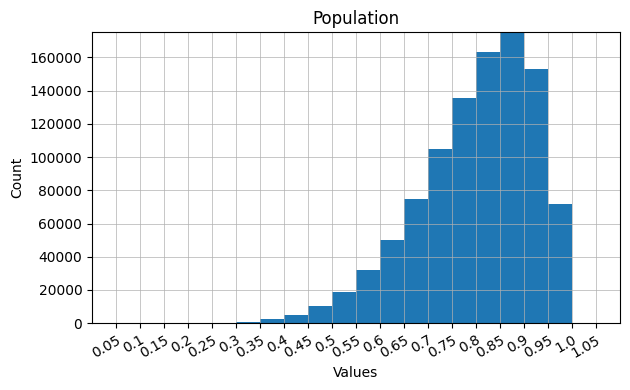

In [197]:
N = int(1e6)
population = np.random.beta(a=8, b=2, size=N)
df_pop = pd.DataFrame(data=population, columns=["value"])
mu = np.mean(population)
sigma = np.std(population)
print(round(mu, 2))
print(round(sigma, 2))

bins = np.arange(0.05, 1.1, 0.05)
_, _ = plots.histogram(df=df_pop, bins=bins, figsize=figsize, title="Population", xlabel=["Values"], ylabel=["Count"])

In [198]:
# Draw a sample
n = 30
x = np.random.choice(population, size=n)
x_bar = np.mean(x)
s_x = np.std(x, ddof=1)
print(round(x_bar, 2))
print(round(s_x, 2))

0.81
0.09


## Two-sided Test

In [199]:
# H0: mu = 0.76
# H1: mu != 0.76
mu_0 = 0.76
alpha = 0.05 # significance level

In [200]:
# Compute the z statistic
z = (x_bar - mu_0)/(sigma / math.sqrt(n))

In [201]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
z_lo = stats.norm.ppf(alpha / 2)
z_hi = stats.norm.ppf(1 - (alpha / 2))
x_lo = mu_0 + (z_lo * (sigma / math.sqrt(n)))
x_hi = mu_0 + (z_hi * (sigma / math.sqrt(n)))

In [202]:
# Check if the value is in the acceptance region
if x_bar >= x_lo and x_bar <= x_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu != {mu_0}, with {1 - alpha} confidence level")

Reject null hypothesis.
mu != 0.76, with 0.95 confidence level


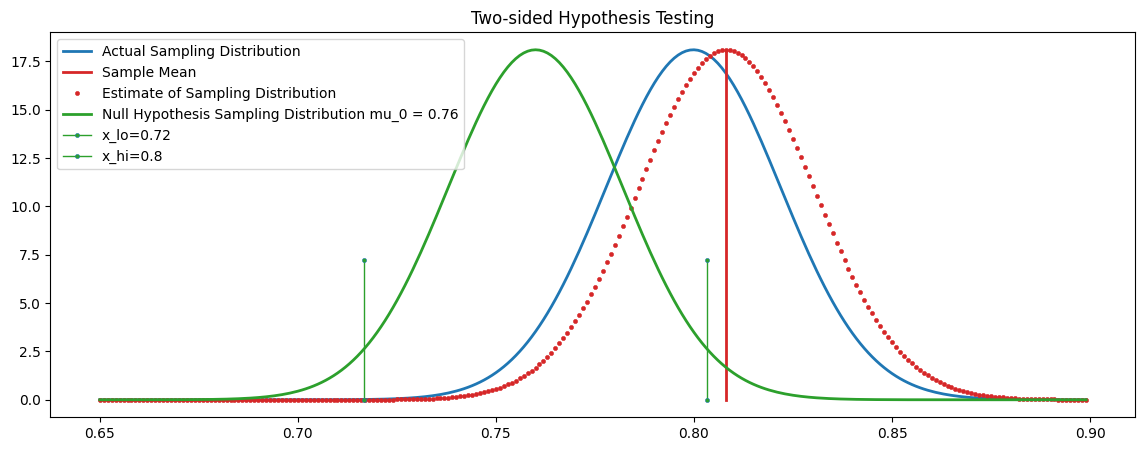

In [203]:
# Visualize the sampling distribution
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1)
samp_dist_x = np.arange(0.65, 0.9, 0.001)
samp_dist_pdf = stats.norm.pdf(samp_dist_x, loc=mu, scale=sigma/math.sqrt(n))
plots.scatter(x=samp_dist_x, y=samp_dist_pdf, fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.BLUE)

# Visualize the sample in relation to the sampling distribution
plots.scatter(x=np.array([x_bar, x_bar]), y=np.array([0,max(samp_dist_pdf)]),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.RED)

# Visualize the estimated sampling distribution based on the sample mean
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=x_bar, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=3, color=plots.RED, markeredgecolor=plots.RED)

# Visualize the sampling distribution asserted by the null hypothesis
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=mu_0, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.GREEN)
plots.scatter(x=np.array([x_lo, x_lo]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
plots.scatter(x=np.array([x_hi, x_hi]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
ax.set_title("Two-sided Hypothesis Testing")

# Add legend to plot
ax.legend(["Actual Sampling Distribution",
           "Sample Mean",
           "Estimate of Sampling Distribution",
           f"Null Hypothesis Sampling Distribution mu_0 = {mu_0}",
           f"x_lo={round(x_lo, 2)}",
           f"x_hi={round(x_hi, 2)}"])

In [241]:
# Using the p-value
pvalue = ht.twoTailPvalue(n=n, mu0=mu_0, sampmean=x_bar, sigma=sigma)
print(pvalue)
if pvalue >= alpha:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu != {mu_0}, with {1 - alpha} confidence level")

0.028971599207661347
Reject null hypothesis.
mu != 0.76, with 0.95 confidence level


## One-sided Lower Bound Test

In [205]:
# H0: mu = 0.76
# H1: mu < 0.76
mu_0 = 0.76
alpha = 0.05 # significance level

In [207]:
# Compute the z statistic
z = (x_bar - mu_0)/(sigma / math.sqrt(n))

In [209]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
z_lo = stats.norm.ppf(alpha)
x_lo = mu_0 + (z_lo * (sigma / math.sqrt(n)))

In [211]:
# Check if the value is in the acceptance region
if x_bar >= x_lo:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu < {mu_0}, with {1 - alpha} confidence level")

Fail to reject null hypothesis.
mu = 0.76, with 0.95 confidence level


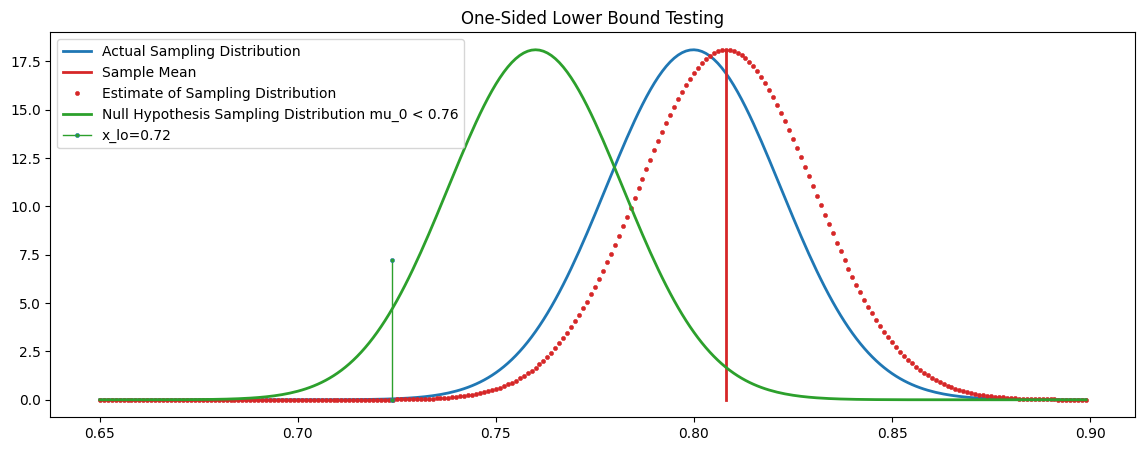

In [235]:
# Visualize the sampling distribution
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1)
samp_dist_x = np.arange(0.65, 0.9, 0.001)
samp_dist_pdf = stats.norm.pdf(samp_dist_x, loc=mu, scale=sigma/math.sqrt(n))
plots.scatter(x=samp_dist_x, y=samp_dist_pdf, fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.BLUE)

# Visualize the sample in relation to the sampling distribution
plots.scatter(x=np.array([x_bar, x_bar]), y=np.array([0,max(samp_dist_pdf)]),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.RED)

# Visualize the estimated sampling distribution based on the sample mean
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=x_bar, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=3, color=plots.RED, markeredgecolor=plots.RED)

# Visualize the sampling distribution asserted by the null hypothesis
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=mu_0, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.GREEN)
plots.scatter(x=np.array([x_lo, x_lo]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
ax.set_title("One-Sided Lower Bound Testing")

# Add legend to plot
ax.legend(["Actual Sampling Distribution",
           "Sample Mean",
           "Estimate of Sampling Distribution",
           f"Null Hypothesis Sampling Distribution mu_0 < {mu_0}",
           f"x_lo={round(x_lo, 2)}"])

In [220]:
# Using the p-value
pvalue = ht.oneTailPvalueLo(n=n, mu0=mu_0, sampmean=x_bar, sigma=sigma)
print(pvalue)
if pvalue >= alpha:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu != {mu_0}, with {1 - alpha} confidence level")

0.9855142003961693
Fail to reject null hypothesis.
mu = 0.76, with 0.95 confidence level


## One-Sided Upper Bound Test

In [222]:
# H0: mu = 0.76
# H1: mu > 0.76
mu_0 = 0.76
alpha = 0.05 # significance level

In [223]:
# Compute the z statistic
z = (x_bar - mu_0)/(sigma / math.sqrt(n))

In [224]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
z_hi = stats.norm.ppf(1 - alpha)
x_hi = mu_0 + (z_hi * (sigma / math.sqrt(n)))

In [233]:
# Check if the value is in the acceptance region
print(x_bar)
if x_bar <= x_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu > {mu_0}, with {1 - alpha} confidence level")

0.8081251565381359
Reject null hypothesis.
mu > 0.76, with 0.95 confidence level


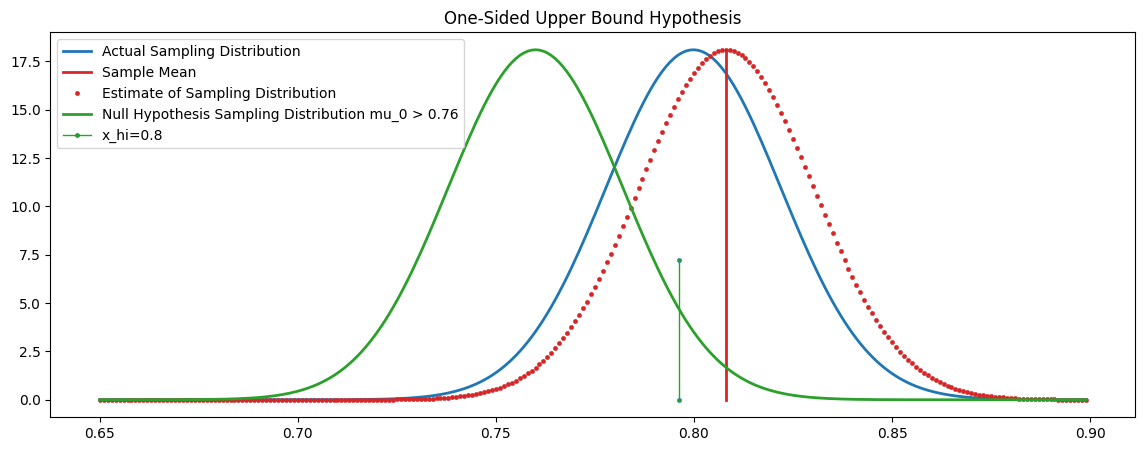

In [236]:
# Visualize the sampling distribution
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1)
samp_dist_x = np.arange(0.65, 0.9, 0.001)
samp_dist_pdf = stats.norm.pdf(samp_dist_x, loc=mu, scale=sigma/math.sqrt(n))
plots.scatter(x=samp_dist_x, y=samp_dist_pdf, fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.BLUE)

# Visualize the sample in relation to the sampling distribution
plots.scatter(x=np.array([x_bar, x_bar]), y=np.array([0,max(samp_dist_pdf)]),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.RED)

# Visualize the estimated sampling distribution based on the sample mean
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=x_bar, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=3, color=plots.RED, markeredgecolor=plots.RED)

# Visualize the sampling distribution asserted by the null hypothesis
plots.scatter(x=samp_dist_x, y=stats.norm.pdf(samp_dist_x, loc=mu_0, scale=sigma/math.sqrt(n)),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.GREEN)
plots.scatter(x=np.array([x_hi, x_hi]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
ax.set_title("One-Sided Upper Bound Hypothesis")

# Add legend to plot
ax.legend(["Actual Sampling Distribution",
           "Sample Mean",
           "Estimate of Sampling Distribution",
           f"Null Hypothesis Sampling Distribution mu_0 > {mu_0}",
           f"x_hi={round(x_hi, 2)}"])

In [240]:
# Using the p-value
pvalue = ht.oneTailPvalueHi(n=n, mu0=mu_0, sampmean=x_bar, sigma=sigma)
print(pvalue)
if pvalue >= alpha:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu > {mu_0}, with {1 - alpha} confidence level")

0.014485799603830674
Reject null hypothesis.
mu > 0.76, with 0.95 confidence level
